In [ ]:
import string
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

words = open('/content/sample_data/names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:


blockSix = 3 # trigram

X, Y = [], []
for w in words[:5]:
    contxt = [0] * blockSix
    for ch in w + '.':
        ix = stoi[ch]
        X.append(contxt)
        Y.append(ix)
        print(''.join(itos[i] for i in contxt), '--->', itos[ix])
        contxt = contxt[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [ ]:
X.shape, X.type, Y.shape, Y.type


(torch.Size([32, 3]),
 <function Tensor.type>,
 torch.Size([32]),
 <function Tensor.type>)

In [ ]:
X


tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

#Predicting NN

# Neural Probablistic Language Model

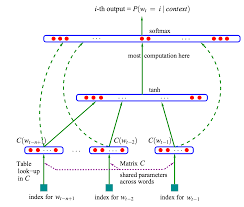

In [ ]:
#Predict NN

In [ ]:
C = torch.randn((27, 2))# loock up table in c

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27) @ C

RuntimeError: expected m1 and m2 to have the same dtype, but got: long int != float

In [ ]:
F.one_hot(torch.tensor(1), num_classes=27).float() @ C

tensor([ 0.5585, -0.6608])

#torch Indexing

In [ ]:
X[10, 2] #10th example 2nd dim

tensor(9)

In [ ]:
C[X][10, 2]

tensor([0.0827, 0.2834])

In [ ]:
C[9]

tensor([0.0827, 0.2834])

#Constructing Hidden Layer
  + num of input==6, WHY cos we've 2dim Embading and we've 3 of them.. 3x2=6inputs

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
w1 = torch.randn((6, 100)) #6input layers / 100hiden layer
b1 = torch.randn(100)

In [ ]:
emb @ w1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

##Using TORCH.CAT To avoid the dim error
 + we need 32x6 dim what we have 32x2
 + using the cat:
    * Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be a 1-D empty tensor with size (0,).
    
    * torch.unbined


//readeMore

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape
#not the ([32, dim==6])

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1) #this is inefficent cos this creating ne storage memory to create whole another tensors thats why use VIEW

tensor([[ 1.1385,  0.7341,  1.1385,  0.7341,  1.1385,  0.7341],
        [ 1.1385,  0.7341,  1.1385,  0.7341,  0.0982, -1.1482],
        [ 1.1385,  0.7341,  0.0982, -1.1482,  0.2038, -1.5303],
        [ 0.0982, -1.1482,  0.2038, -1.5303,  0.2038, -1.5303],
        [ 0.2038, -1.5303,  0.2038, -1.5303,  0.5585, -0.6608],
        [ 1.1385,  0.7341,  1.1385,  0.7341,  1.1385,  0.7341],
        [ 1.1385,  0.7341,  1.1385,  0.7341, -0.4522, -0.8539],
        [ 1.1385,  0.7341, -0.4522, -0.8539, -0.2968,  0.9810],
        [-0.4522, -0.8539, -0.2968,  0.9810,  1.3814,  0.9693],
        [-0.2968,  0.9810,  1.3814,  0.9693,  0.3684, -0.8311],
        [ 1.3814,  0.9693,  0.3684, -0.8311,  1.3814,  0.9693],
        [ 0.3684, -0.8311,  1.3814,  0.9693,  0.5585, -0.6608],
        [ 1.1385,  0.7341,  1.1385,  0.7341,  1.1385,  0.7341],
        [ 1.1385,  0.7341,  1.1385,  0.7341,  0.5585, -0.6608],
        [ 1.1385,  0.7341,  0.5585, -0.6608,  0.3684, -0.8311],
        [ 0.5585, -0.6608,  0.3684, -0.8

#Tensors in Torch / Pytorch Internals
  * view

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [ ]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.view(9, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [ ]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
h = emb.view(32, 6) @ w1 + b1
#h = emb.view(-1, 6) @ w1 + b1 // this -1 should==(32) cos if 6 torch #derived 32 like that and so we dont need to hardcode mxn

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
# also this w1+b1 Brodcasting
## in BROADCASTING
# 32 100
#  1 100 // Fake 1dim
# the right hand[100] should math and the left sould be Match Or Empty so this work as well
# Always make sure About BRoadcasting

###Final Layer

In [ ]:
w2 = torch.randn((100, 27)) #27 cos we've 27 chars
b2 = torch.randn((27))

In [ ]:
logits = h @ w2 + b2 #ligits or OUTPUT of last layer

In [ ]:
counts = logits.exp() #exp to get fake coutns

In [ ]:
probs = counts / counts.sum(1, keepdims=True) # get the noraml dist,,. and keep 1st dim

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
probs[torch.arange(32), Y] # this will Correct Prob as asign by this nn to the corect Char


tensor([1.7787e-08, 2.7029e-08, 1.0006e-06, 3.1149e-09, 5.1750e-11, 9.8736e-01,
        1.7754e-04, 8.3977e-06, 3.6400e-04, 6.7402e-11, 2.4373e-07, 9.0878e-10,
        3.4906e-09, 1.5956e-14, 3.0513e-10, 3.5853e-07, 8.9168e-10, 9.7489e-02,
        1.1834e-12, 1.3589e-05, 3.2929e-13, 7.6760e-01, 4.7776e-12, 1.2631e-04,
        1.0036e-08, 6.0301e-03, 9.9981e-01, 1.6863e-12, 1.4207e-02, 8.2476e-11,
        1.1411e-06, 5.9284e-11])

#Negative Log Likelyhood Loss

In [ ]:
loss = -probs[torch.arange(32), Y].log().mean() #take the log,,/ avarage prob and - it
loss

tensor(17.4659)

#Now Train

In [ ]:
X.shape, Y.shape # Dataset

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
# Parameters

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn((100), generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
para = [C, w1, b1, w2, b2]

In [ ]:
#num in para in total
sum(p.nelement() for p in para)

3481

In [ ]:
#Forward Pass

emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
logits = h @ w2 + b2
### Loss
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdims=True)
#loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

## Dont Calculate Loss manualy these codes Use CROSS_ENROPY cos it Efficent and make math Cal Easy also backward pass

tensor(17.7697)

In [ ]:
#Also we can use Cross_entropy from torch
#and it gives the same result as those Loss Codes
#F.cross_entropy(logits, Y)

tensor(17.7697)

In [ ]:
 #Backward Pass
for p in para:
    p.grad = None
loss.backward()

#update
learningRate = -0.1
for p in para:
    p.data += learningRate * p.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
for p in para:
    p.requires_grad = True
#if not set the requires_grad to True. ::
#           RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn
#this error will ocure


#Optimizing

In [ ]:

for i in range(100):
    #Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y)
    #print(loss.item())
    #Backward Pass
    for p in para:
        p.grad = None
    loss.backward()

    #update
    learningRate = -0.1
    for p in para:
        p.data += learningRate * p.grad

print(f'Loss: {loss.item()}')

Loss: 0.2772060036659241


# full dataset TRAINING
#
#Train the Full Dataset
#
# full dataset TRAINING

#MODEL
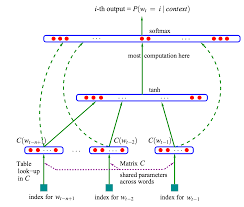

In [ ]:

blockSix = 3 # trigram

X, Y = [], []
for w in words:
    contxt = [0] * blockSix
    for ch in w + '.':
        ix = stoi[ch]
        X.append(contxt)
        Y.append(ix)
        #print(''.join(itos[i] for i in contxt), '--->', itos[ix])
        contxt = contxt[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn((100), generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
para = [C, w1, b1, w2, b2]

In [ ]:
for p in para:
    p.requires_grad = True

In [ ]:
#creating mini batch to train so itll be quick rather than train the whole dataset
ix = torch.randint(0, X.shape[0], (32,))
ix

tensor([ 67806,  84404,  18338,  41910,  30320,  74266,  76911,  19842, 153296,
         75610,  99198, 110870,  72375,  11499, 187378,  59326, 214621,  52323,
        114159,  53887,  29375,  53860, 157371, 162158, 167674, 170665, 181711,
        147495, 141381,  30071, 101580, 180192])

#Fine tuning Learning Rate
   + By using lre, we're creating a learning rate schedule that exponentially decreases over time.
   + instead of using a constant learning rate like 0.1, we're creating a learning rate schedule that gradually decreases from 0.1 to 1.0
   + torch.linspace(-1, 0, 1000) generates 1000 values linearly spaced between -1 and 0.
   + 10**lre then takes 10 raised to the power of each value in lre. This transforms the range from [10^(-1), 10^(0)], or [0.1, 1].

In [ ]:
#learning Rate Exponent
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
## since it got 1m 3s to train we can Use mini batch Randomly select by Dataset

#track learning rate stars || we figurout good learning rante==0.1 #according to stat
#lri = []
#losses = []

for i in range(10000):
    #minibatch
    ix = torch.randint(0, X.shape[0], (32,))
    #Forward Pass
    emb = C[X[ix]]#using mini batch
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y[ix])#using mini batch

    #Backward Pass
    for p in para:
        p.grad = None
    loss.backward()

    #update
    #lr = 0.1 #10**-1 || after itrations Learning rate decay
    lr = 0.01

    for p in para:
        p.data += -lr * p.grad

    #track stats Learning rate fineTune
    #lri.append(lre[i])
    #losses.append(loss.item())

print(f'Loss: {loss.item()}')

## After using mini batch to train its almost instant

## after learing rt finetune decrease 2.8 to 2.5 Loss

Loss: 2.2990012168884277


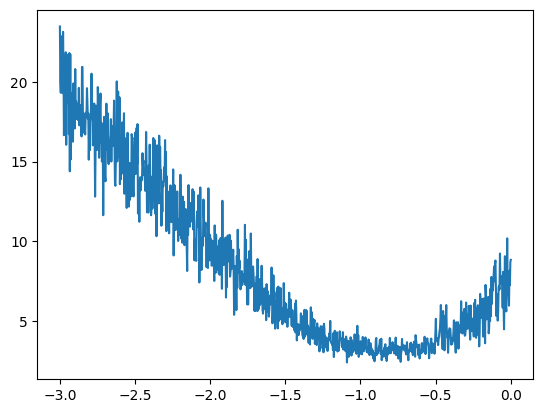

In [ ]:
# Looking at the stat, the fair Learning
# Rate Would be -1.0..-0.5 which is [0.1]
# So now  we've Confidence/Stats so we set learning rate to == 0.1
plt.plot(lri, losses)

In [ ]:
#